In [1]:
import numpy as np
import pandas as pd

In [2]:
df_sales= pd.read_csv('易速鲜花订单记录.csv')
print('日期反问:%s----%s'%(df_sales['消费日期'].min(),df_sales['消费日期'].max()))
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期'])

日期反问:1/1/2021 10:11----9/9/2020 9:20


In [3]:
print('日期反问:%s----%s'%(df_sales['消费日期'].min(),df_sales['消费日期'].max()))

日期反问:2020-06-01 09:09:00----2021-06-09 12:31:00


In [4]:
df_sales=df_sales.loc[df_sales['消费日期']< '2021-06-01']
print('日期反问:%s----%s'%(df_sales['消费日期'].min(),df_sales['消费日期'].max()))
df_sales['总价'] = df_sales['单价'] * df_sales['数量']

日期反问:2020-06-01 09:09:00----2021-05-31 17:39:00


In [5]:
df_sales_3m = df_sales[(df_sales.消费日期 > '2020-06-01') & (df_sales.消费日期 < '2020-08-31')]

In [6]:
df_sales_3m.reset_index()
city = pd.get_dummies(df_sales_3m.城市,prefix='城市')
df_sales_3m = pd.concat([df_sales_3m,city],axis=1)
df_sales_3m

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价,城市_上海,城市_北京,城市_广州,城市_成都,城市_深圳,城市_苏州,城市_西安
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.40,False,True,False,False,False,False,False
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.60,True,False,False,False,False,False,False
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.20,True,False,False,False,False,False,False
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.50,False,True,False,False,False,False,False
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.50,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15234,545337,20766,2020-08-30 17:28:00,产品说明掩码,1,3.75,15984,广州,3.75,False,False,True,False,False,False,False
15235,545337,20764,2020-08-30 17:28:00,产品说明掩码,1,3.75,15984,广州,3.75,False,False,True,False,False,False,False
15236,545337,84985A,2020-08-30 17:28:00,产品说明掩码,1,1.45,15984,广州,1.45,False,False,True,False,False,False,False
15237,545337,22445,2020-08-30 17:28:00,产品说明掩码,1,2.95,15984,广州,2.95,False,False,True,False,False,False,False


In [8]:
df_user_LTV = pd.DataFrame(df_sales['用户码'].unique())
df_user_LTV.columns = ['用户码']
#df_user_LTV.head()
df_R_value = df_sales_3m.groupby('用户码').消费日期.max().reset_index()

df_R_value.columns = ['用户码','最近购买日期']
df_R_value
df_R_value['R值'] = (df_R_value['最近购买日期'].max() - df_R_value['最近购买日期']).dt.days
#df_R_value['R值'] = pd.Between(df_R_value['最近购买日期'].max() ,df_R_value['最近购买日期'])
df_R_value.head()
df_user_LTV = pd.merge(df_user_LTV,df_R_value[['用户码','R值']],on='用户码')

df_F_value = df_sales_3m.groupby('用户码').消费日期.count().reset_index()
df_F_value.columns = ['用户码','F值']
df_user_LTV = pd.merge(df_user_LTV,df_F_value[['用户码','F值']])

df_M_value = df_sales_3m.groupby('用户码').总价.sum().reset_index()
df_M_value.columns = ['用户码','M值']
df_user_LTV = pd.merge(df_user_LTV,df_M_value[['用户码','M值']])

#df_user_LTV = pd.merge(df_user_LTV,df_sales_3m[['用户码','城市_上海','城市_北京','城市_广州','城市_成都','城市_深圳','城市_西安']])

df_user_LTV


,用户码,R值,F值,M值
0,15100,47,6,635.10
1,15291,36,35,1329.95
2,14688,0,103,1682.58
3,15311,0,751,14120.07
4,15862,90,64,354.23
...,...,...,...,...
372,15709,0,6,133.25
373,15241,0,28,395.33
374,15092,0,19,323.16
375,15319,0,16,204.50


In [9]:
df_user_1y = df_sales.groupby('用户码')['总价'].sum().reset_index()
df_user_1y.columns = ['用户码','年度LTV']
df_user_1y.head()

,用户码,年度LTV
0,14681,498.95
1,14682,52.00
2,14684,1236.28
3,14687,628.38
4,14688,4470.65


In [10]:
df_LTV = pd.merge(df_user_LTV,df_user_1y,on='用户码',how='left')
df_LTV

,用户码,R值,F值,M值,年度LTV
0,15100,47,6,635.10,635.10
1,15291,36,35,1329.95,4596.51
2,14688,0,103,1682.58,4470.65
3,15311,0,751,14120.07,58352.77
4,15862,90,64,354.23,659.73
...,...,...,...,...,...
372,15709,0,6,133.25,133.25
373,15241,0,28,395.33,1738.59
374,15092,0,19,323.16,457.81
375,15319,0,16,204.50,204.50


Duplicate key in file PosixPath('/opt/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 801 ('font.family :sans-serif')
Duplicate key in file PosixPath('/opt/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 802 ('font.sans-serif :SimHei')
Duplicate key in file PosixPath('/opt/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 803 ('axes.unicode_minus :False')


<Axes: >

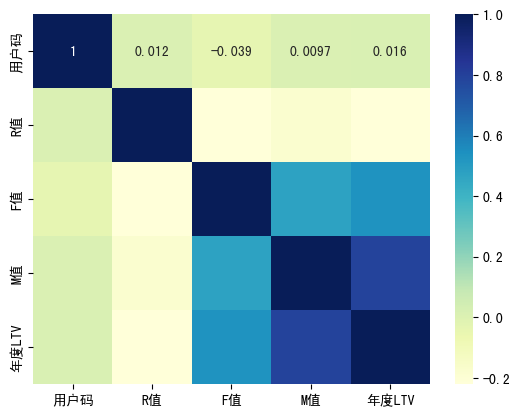

In [11]:
import seaborn as sns
sns.heatmap(df_LTV.corr(),cmap="YlGnBu", annot = True)

In [12]:
X = df_LTV.drop(['用户码','年度LTV'],axis=1)
y = df_LTV['年度LTV']
X,y

(     R值   F值        M值
 0    47    6    635.10
 1    36   35   1329.95
 2     0  103   1682.58
 3     0  751  14120.07
 4    90   64    354.23
 ..   ..  ...       ...
 372   0    6    133.25
 373   0   28    395.33
 374   0   19    323.16
 375   0   16    204.50
 376   0    7    317.15
 
 [377 rows x 3 columns],
 0        635.10
 1       4596.51
 2       4470.65
 3      58352.77
 4        659.73
          ...   
 372      133.25
 373     1738.59
 374      457.81
 375      204.50
 376      232.15
 Name: 年度LTV, Length: 377, dtype: float64)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_rem,y_train,y_rem = train_test_split(X,y,train_size = 0.7,random_state = 36)

X_valid,X_test,y_valid,y_test = train_test_split(X_rem,y_rem,test_size=0.5,random_state = 36)

In [14]:
X_train,X_rem,y_train,y_rem

(     R值  F值      M值
 138  82   2  181.00
 208  74  12  177.15
 358   5  32  769.24
 375   0  16  204.50
 33   15  40  473.52
 ..   ..  ..     ...
 300  30  26  199.60
 250  47  15  301.11
 161  79  24  110.10
 98   83  57  189.64
 133   0  19  364.30
 
 [263 rows x 3 columns],
      R值  F值       M值
 19   78  19   495.30
 322  22   4    29.65
 51   74  90   471.00
 338  13  26   377.32
 56    9  35  2543.56
 ..   ..  ..      ...
 315  26   1    15.00
 167  78   7   418.92
 336  11   7    53.80
 37   54  17  -840.76
 128  77  10   161.20
 
 [114 rows x 3 columns],
 138     181.00
 208     475.28
 358    3429.55
 375     204.50
 33     1641.48
         ...   
 300     348.60
 250     954.09
 161     407.50
 98     1653.55
 133    1552.01
 Name: 年度LTV, Length: 263, dtype: float64,
 19     1400.34
 322     258.88
 51     1158.30
 338    1145.43
 56     6945.02
         ...   
 315     379.35
 167     418.92
 336      53.80
 37     -840.76
 128     346.75
 Name: 年度LTV, Length: 114, dtype: f

In [15]:
X_valid,X_test,y_valid,y_test

(     R值   F值       M值
 67   86  106   313.28
 32    2   52  1268.99
 263  42    7   107.45
 227  26  175   861.15
 167  78    7   418.92
 270  40   10   178.95
 28   89   17   420.50
 156  29   32   438.24
 72   13  146  1070.12
 104  36  163  3223.64
 289   1   30   625.07
 69   42  105  1037.90
 307  28    4   270.00
 12   90    5   115.65
 266  41   15   295.05
 311  27    8   154.41
 267  40    4   114.68
 116   0   69   598.32
 230  53   13   104.76
 189  75   12   186.00
 176  76   29   428.82
 285  35    9   169.65
 78   48   35   366.46
 309   0    5   879.00
 62   83   35  1661.06
 117   2   44  2080.83
 212  32   27   580.30
 332  18   43   252.29
 87   85   34   673.37
 204  75   50   356.35
 120  83   70   373.77
 336  11    7    53.80
 331  18    2   -94.00
 57    2  164  1616.13
 8    90   71   313.49
 50   18   21  5880.20
 174  77   25   140.40
 322  22    4    29.65
 333  15   15   321.05
 181  76   17   300.87
 37   54   17  -840.76
 34   28   20   247.66
 157  77  1

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor

model_lr = LinearRegression()
model_lasso = Lasso()
model_ridge = Ridge()
model_dtr = DecisionTreeRegressor()
model_dtr_cut = DecisionTreeRegressor(max_depth=3) 
#model_rfr =RandomForestRegressor()

model_lr.fit(X_train,y_train)
model_lasso.fit(X_train,y_train)
model_ridge.fit(X_train,y_train)
model_dtr.fit(X_train,y_train)
model_dtr_cut.fit(X_train,y_train)
#model_rfr.fit(X_train,y_train)

#y_valid_preds_lr = model_lr.predict(X_valid)
#y_valid_preds_lr_lasso = model_lasso.predict(X_valid)
#y_valid_preds_lr_ridge = model_ridge.predict(X_valid)

#y_valid_preds_dtr = model_dtr.predict(X_valid)
#y_valid_preds_dtr_cut=model_dtr_cut.predict(X_valid)
#y_valid_preds_rfr = model_rfr.predict(X_valid)



DecisionTreeRegressor(max_depth=3)

In [27]:
from sklearn.metrics import r2_score,   median_absolute_error #导入Sklearn评估模块
print('训练集上的R平方分数-线性回归: %0.4f' % r2_score(y_train, model_lr.predict(X_train)))
print('训练集上的R平方分数-Lasso回归: %0.4f' % r2_score(y_train, model_lasso.predict(X_train)))
print('训练集上的R平方分数-Ridge回归: %0.4f' % r2_score(y_train, model_ridge.predict(X_train)))
print('测试集上的R平方分数-线性回归: %0.4f' % r2_score(y_valid, model_lr.predict(X_valid)))
print('测试集上的R平方分数-Lasso回归: %0.4f' % r2_score(y_valid, model_lasso.predict(X_valid)))
print('测试集上的R平方分数-Ridge回归: %0.4f' % r2_score(y_valid, model_ridge.predict(X_valid)))


print('训练集上的R平方分数-决策树: %0.4f' % r2_score(y_train, model_dtr.predict(X_train)))
print('训练集上的R平方分数-深度为3的决策树: %0.4f' % r2_score(y_train, model_dtr_cut.predict(X_train)))
print('测试集上的R平方分数-决策树: %0.4f' % r2_score(y_valid, model_dtr.predict(X_valid)))
print('测试集上的R平方分数-深度为3的决策树: %0.4f' % r2_score(y_valid, model_dtr_cut.predict(X_valid)))

训练集上的R平方分数-线性回归: 0.6976
训练集上的R平方分数-Lasso回归: 0.6976
训练集上的R平方分数-Ridge回归: 0.6976
测试集上的R平方分数-线性回归: 0.5064
测试集上的R平方分数-Lasso回归: 0.5064
测试集上的R平方分数-Ridge回归: 0.5064
训练集上的R平方分数-决策树: 1.0000
训练集上的R平方分数-深度为3的决策树: 0.7997
测试集上的R平方分数-决策树: 0.3330
测试集上的R平方分数-深度为3的决策树: 0.4966


In [28]:
df_LTV

,用户码,R值,F值,M值,年度LTV
0,15100,47,6,635.10,635.10
1,15291,36,35,1329.95,4596.51
2,14688,0,103,1682.58,4470.65
3,15311,0,751,14120.07,58352.77
4,15862,90,64,354.23,659.73
...,...,...,...,...,...
372,15709,0,6,133.25,133.25
373,15241,0,28,395.33,1738.59
374,15092,0,19,323.16,457.81
375,15319,0,16,204.50,204.50


In [49]:
from sklearn.model_selection import KFold
kf5 = KFold(n_splits=5,shuffle=False)
i = 1
model_lr_kf5 = LinearRegression()
for train_index,test_index in kf5.split(df_LTV):
    X_train = df_LTV.iloc[train_index].drop(['年度LTV'],axis=1)
    X_test = df_LTV.iloc[test_index].drop(['年度LTV'],axis=1)
    y_train = df_LTV.iloc[train_index]['年度LTV']
    y_test = df_LTV.iloc[test_index]['年度LTV']
    model_lr_kf5.fit(X_train,y_train)
   # model_lr_kf5.fit(X_train,y_train)
    print(f"第{i}折验证集R2分熟：{r2_score(y_test,model_lr_kf5.predict(X_test))}")
    i += 1
  

第1折验证集R2分熟：0.548670830104041
第2折验证集R2分熟：0.5761178774681743
第3折验证集R2分熟：0.4873968815136791
第4折验证集R2分熟：-1.7235386346373889
第5折验证集R2分熟：0.12088698355962246


In [50]:
from sklearn.model_selection import cross_val_score
model_cvs = LinearRegression()
scores = cross_val_score(model_cvs,
                        X_train,
                        y_train,
                        cv =5,
                        scoring="neg_mean_absolute_error")
for i,score in enumerate(scores):
    print(f"第{i}折验证集平均绝对误差:{---score}")

第0折验证集平均绝对误差:3494.83698023751
第1折验证集平均绝对误差:1635.4189110185996
第2折验证集平均绝对误差:1289.721915064311
第3折验证集平均绝对误差:1136.1235459000247
第4折验证集平均绝对误差:1794.8792032407132


In [69]:
from sklearn.ensemble import RandomForestRegressor
model_rfr =RandomForestRegressor()
rf_param_grid ={
    "max_depth":[None],
    "max_features":[3,5,12],
    "min_samples_leaf":[3,5,10],
    "bootstrap":[False],
    "n_estimators":[100,300],
   # "criterion":['gini']
}

from sklearn.model_selection import GridSearchCV
model_rfr_gs = GridSearchCV(model_rfr,
                           param_grid = rf_param_grid,
                           cv=3,
                           scoring="r2",
                           n_jobs=10,
                           verbose=1)
model_rfr_gs.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=10,
             param_grid={'bootstrap': [False], 'max_depth': [None],
                         'max_features': [3, 5, 12],
                         'min_samples_leaf': [3, 5, 10],
                         'n_estimators': [100, 300]},
             scoring='r2', verbose=1)

In [70]:
print(" 最佳参数组合:", model_rfr_gs.best_params_)

 最佳参数组合: {'bootstrap': False, 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 100}


In [71]:
print('训练集上的R平方分数-调参后的随机森林: %0.4f' % r2_score(y_train, model_rfr_gs.predict(X_train)))
print('测试集上的R平方分数-调参后的随机森林: %0.4f' % r2_score(y_test, model_rfr_gs.predict(X_test)))

训练集上的R平方分数-调参后的随机森林: 0.7099
测试集上的R平方分数-调参后的随机森林: -0.3809
